The link for the original Assignment2 document by Alexey Grigorev:

https://github.com/alexeygrigorev/mlbookcamp-code/blob/master/course-zoomcamp/cohorts/2022/02-regression/homework.md

### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).

### EDA

* Load the data.
* Look at the `median_house_value` variable. Does it have a long tail? 

### Features

For the rest of the homework, you'll need to use only these columns:

* `'latitude'`,
* `'longitude'`,
* `'housing_median_age'`,
* `'total_rooms'`,
* `'total_bedrooms'`,
* `'population'`,
* `'households'`,
* `'median_income'`,
* `'median_house_value'`

Select only them.

### Environments

In [326]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import wget
%matplotlib inline

In [175]:
url = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv'
wget.download(url)

100% [..........................................................................] 1423529 / 1423529

'housing (1).csv'

In [665]:
df = pd.read_csv('housing.csv')

### EDA

* Load the data.

In [666]:
df.head(3)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY


In [667]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [668]:
df.ocean_proximity.value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [669]:
df.describe().T # we will work float features

,count,mean,std,min,25%,50%,75%,max
longitude,20640.0,-119.569704,2.003532,-124.3500,-121.8000,-118.4900,-118.01000,-114.3100
latitude,20640.0,35.631861,2.135952,32.5400,33.9300,34.2600,37.71000,41.9500
housing_median_age,20640.0,28.639486,12.585558,1.0000,18.0000,29.0000,37.00000,52.0000
total_rooms,20640.0,2635.763081,2181.615252,2.0000,1447.7500,2127.0000,3148.00000,39320.0000
total_bedrooms,20433.0,537.870553,421.385070,1.0000,296.0000,435.0000,647.00000,6445.0000
population,20640.0,1425.476744,1132.462122,3.0000,787.0000,1166.0000,1725.00000,35682.0000
households,20640.0,499.539680,382.329753,1.0000,280.0000,409.0000,605.00000,6082.0000
median_income,20640.0,3.870671,1.899822,0.4999,2.5634,3.5348,4.74325,15.0001
median_house_value,20640.0,206855.816909,115395.615874,14999.0000,119600.0000,179700.0000,264725.00000,500001.0000


In [670]:
df.isnull().sum() # there is 207 nan in 

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

* Look at the `median_house_value` variable. Does it have a long tail? 

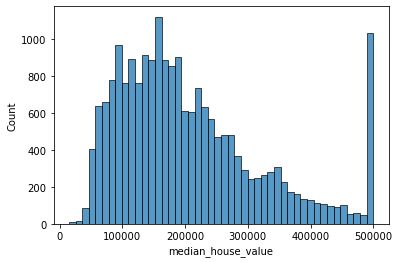

In [671]:
sns.histplot(df.median_house_value) # im not sure but it could be a little long tail so ill get log and look again.
plt.show()

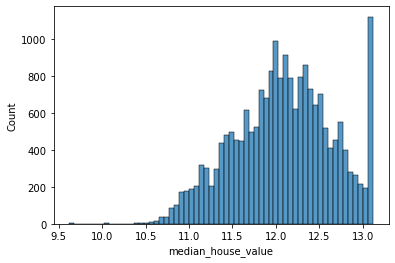

In [672]:
log_house_value = np.log1p(df.median_house_value)
sns.histplot(log_house_value)
plt.show() # looks better like this

### Question 1

Find a feature with missing values. How many missing values does it have?
- 207
- 307
- 408
- 508

In [673]:
df.isnull().sum() # there are 207 missing values (total_bedrooms)

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

### Question 2

What's the median (50% percentile) for variable 'population'?
- 1133
- 1122
- 1166
- 1188

In [674]:
df.population.median() # population median is 1116

1166.0

### Split the data

* Shuffle the initial dataset, use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.
* Make sure that the target value ('median_house_value') is not in your dataframe.
* Apply the log transformation to the median_house_value variable using the `np.log1p()` function.

In [675]:
# we will divie 3 train - valid - test
n = len(df)
n_test = int(n * 0.2)
n_val = int(n * 0.2)
n_train = n - n_test - n_val

print(n)
assert n == (n_test + n_val + n_train) # if something goes wrong 

20640


In [676]:
np.random.seed(42)

# we need to index shuffle 
idx = np.arange(n)
np.random.shuffle(idx)

idx

array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [677]:
base = ['latitude',
    'longitude',
    'housing_median_age',
    'total_rooms',
    'total_bedrooms',
    'population',
    'households',
    'median_income',
    'median_house_value']

df = df[base]
df.columns

Index(['latitude', 'longitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value'],
      dtype='object')

In [678]:
df_train = df.iloc[idx[:n_train]].reset_index(drop = True)
df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop = True)
df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop = True)

In [679]:
df_train.shape

(12384, 9)

In [680]:
# now im gonna split x and y

In [681]:
y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

In [682]:
y_train.shape , y_train

((12384,),
 array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
        11.93032573, 12.9487264 ]))

In [683]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [704]:
X_train = df_train.copy()

### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:
- With 0
- With mean
- Both are equally good

In [705]:
mean = X_train.total_bedrooms.mean() # missing value is total_bedrooms  # training 
X_train_mean = X_train.fillna(mean).values
X_train_zero = X_train.fillna(0).values


In [706]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [707]:
def rmse(y, y_pred):
    rmse =np.sqrt(((y - y_pred) ** 2).mean())
    return  rmse

In [708]:
w0, w = train_linear_regression(X_train_mean, y_train)

In [709]:
# i don't fill missing values for valid because there is no missing values in valid. all missings are in train
X_val = df_val.values

In [710]:
y_pred = w0 + X_val.dot(w)
y_pred

array([12.2289367 , 11.51392123, 11.90238726, ..., 12.02939054,
       13.22259321, 12.61801395])

In [711]:
rmse_mean = rmse(y_val, y_pred)
round(rmse_mean,2)

0.34

In [712]:
w0, w = train_linear_regression(X_train_mean, y_train)

In [713]:
y_pred = w0 + X_val.dot(w)
y_pred

array([12.2289367 , 11.51392123, 11.90238726, ..., 12.02939054,
       13.22259321, 12.61801395])

In [714]:
rmse_zero = rmse(y_val, y_pred)
round(rmse_zero, 2) 

0.34

In [715]:
round(rmse_mean, 2),  round(rmse_zero, 2) # Both are equally good

(0.34, 0.34)

### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0. 
* Try different values of `r` from this list: `[0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If there are multiple options, select the smallest `r`.

Options:
- 0
- 0.000001
- 0.001
- 0.0001

In [716]:
def train_linear_regression_reg(X, y, r= 0.01):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [717]:
X_train_zero = X_train.fillna(0).values
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]
for r in r_list:
    w0, w = train_linear_regression_reg(X_train_zero, y_train, r=r)
    y_pred = w0 + X_val.dot(w)
    print(round(rmse(y_val, y_pred), 2), r)
    # 0.000001 is my answer    
    

0.34 0
0.34 1e-06
0.34 0.0001
0.34 0.001
0.34 0.01
0.34 0.1
0.34 1
0.34 5
0.35 10


### Question 5 

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores. 
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different. 
> If standard deviation of scores is low, then our model is *stable*.

Options:
- 0.16
- 0.00005
- 0.005
- 0.15555

In [699]:
seeds = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
rmses = []
for s in seeds: 
    np.random.seed(s)
    idx = np.arange(n)
    np.random.shuffle(idx)
    
    df_train = df.iloc[idx[:n_train]].reset_index(drop = True).fillna(0)
    df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop = True).fillna(0)
    df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop = True).fillna(0)


    y_train = np.log1p(df_train['median_house_value'].values)
    y_val = np.log1p(df_val['median_house_value'].values)
    y_test = np.log1p(df_test['median_house_value'].values)
    
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    
    X_train = df_train.values
    X_val = df_val.values
    w0, w = train_linear_regression(X_train, y_train)
    y_pred = w0 + X_val.dot(w)
    rms = rmse(y_val, y_pred)
    print(rms)
    rmses.append(rms)

0.33884304805305243
0.3362387255955844
0.33209123188372575
0.34051536090328655
0.3389024066571935
0.34348667257168586
0.34519809530989065
0.3395989927401254
0.3466230873184391
0.3365926124175645


In [700]:
rmses = np.array(rmses)
rmses.std()

0.0041707719466455295

In [701]:
round(rmses.std(), 3) ## 0.004

0.004

### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`. 
* What's the RMSE on the test dataset?

Options:
- 0.35
- 0.135
- 0.450
- 0.245

In [702]:
np.random.seed(9)
idx = np.arange(n)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop = True).fillna(0)
df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop = True).fillna(0)
df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop = True).fillna(0)


y_train = np.log1p(df_train['median_house_value'].values)
y_val = np.log1p(df_val['median_house_value'].values)
y_test = np.log1p(df_test['median_house_value'].values)

del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']


df_full_train = pd.concat([df_train, df_val]).reset_index(drop = True).values
y_full_train = np.concatenate([y_train, y_val])
X_test = df_test.values
w0, w = train_linear_regression_reg(df_full_train, y_full_train, r=0.001)
y_pred = w0 + X_test.dot(w)
rmse(y_test, y_pred) # answer is 0.3453168914371051 // 0.35

0.3453168914371051

The deadline for submitting is, 19 September 2022, 23:00 CET. After that, the form will be closed.